In [1]:
! pip install pandas
! pip install matplotlib
! pip install sklearn
! pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
import pandas as pd
import sklearn.ensemble as skle
import sklearn.svm as svm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold
import sklearn.metrics as sm

In [3]:
df = pd.read_csv('V5_final_dataset.csv', index_col=0).drop_duplicates()

In [4]:
X = df.drop(columns=['Glu (vein)'])
y = df['Glu (vein)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_s = preprocessing.normalize(X_train)
X_test_s = preprocessing.normalize(X_test)

In [7]:
skle.GradientBoostingRegressor.get_params(skle.GradientBoostingRegressor).keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [6]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [10]:
params_grid_GB = {'loss': ['ls', 'lad', 'huber'], 
                  'min_samples_leaf': range(5, 20, 5),
                 }
grad_boosting = skle.GradientBoostingRegressor(random_state=42, n_estimators=1000)
GS_GB = GridSearchCV(grad_boosting, params_grid_GB, cv=cv, scoring='neg_mean_squared_error')
GS_GB.fit(X_train, y_train)
grad_boosting_GS_y = GS_GB.predict(X_test)

In [8]:
sm.mean_squared_error(y_test, grad_boosting_GS_y), sm.r2_score(y_test, grad_boosting_GS_y)  

(0.8817433195415945, 0.9421154547833219)

In [13]:
GS_GB.best_params_

{'loss': 'ls', 'min_samples_leaf': 5}

In [7]:
grad_boosting = skle.GradientBoostingRegressor(random_state=42, n_estimators=1000, loss='ls', min_samples_leaf=5)
grad_boosting.fit(X_train, y_train)
grad_boosting_GS_y = grad_boosting.predict(X_test)

In [9]:
sm.mean_squared_error(y_test, grad_boosting_GS_y), sm.r2_score(y_test, grad_boosting_GS_y)  

(0.8817433195415945, 0.9421154547833219)

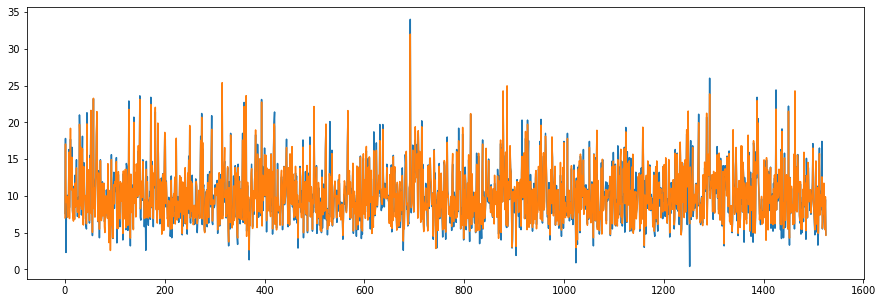

In [16]:
plt.figure(figsize=(15,5)) 
plt.plot(y_test.tolist(), label='Y test')
plt.plot(grad_boosting_GS_y, label='GB')

In [17]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], GS_GB.best_estimator_.feature_importances_[i])

Sex 0.00034625700549572675
Smoke_status 0.00029831580066722795
SBE (vein) 3.015486843255504e-05
HCO3- (P, st) (vein) 0.00017858430936298458
FCOHb (vein) 0.00012021627822532275
FHHb (vein) 0.0001694410058945042
FMetHb (vein) 5.944934014191377e-05
FHbF (vein) 2.1211777764905395e-05
F02Hb (vein) 0.00010458886888650847
ctBil (vein) 0.0014248110383858527
pH (vein) 0.001656619409561856
pO2 (vein) 0.0026680266085935536
pCO2 (vein) 0.0023470307182366203
ABE (vein) 0.0027800515250879657
HCO3- (P) (vein) 0.00112285436549142
sO2 (vein) 0.001483158812125294
ctHb (vein) 0.008553017645936125
Hct (vein) 0.001212841086681209
K + (vein) 0.002112579458240182
Na + (vein) 0.40837095302949317
Ca2 + ( vein) 0.0022199674611230727
Cl- (vein) 0.006759973153600599
Lac (vein) 0.06773332730581882
Osmolarity (vein) 0.46644133781672875
ctO2 (vein) 0.018077507790488414
p50 (vein) 0.0017810946861301863
Age 0.0019266288334051683


In [10]:
feat = {}
for i in range(len(X_train.columns)):
    feat[X_train.columns[i]] = grad_boosting.feature_importances_[i]
    
sorted( ((k,v) for v,k in feat.items()), reverse=True) 

[(0.46644133781672875, 'Osmolarity (vein)'),
 (0.40837095302949317, 'Na + (vein)'),
 (0.06773332730581882, 'Lac (vein)'),
 (0.018077507790488414, 'ctO2 (vein)'),
 (0.008553017645936125, 'ctHb (vein)'),
 (0.006759973153600599, 'Cl- (vein)'),
 (0.0027800515250879657, 'ABE (vein)'),
 (0.0026680266085935536, 'pO2 (vein)'),
 (0.0023470307182366203, 'pCO2 (vein)'),
 (0.0022199674611230727, 'Ca2 + ( vein)'),
 (0.002112579458240182, 'K + (vein)'),
 (0.0019266288334051683, 'Age'),
 (0.0017810946861301863, 'p50 (vein)'),
 (0.001656619409561856, 'pH (vein)'),
 (0.001483158812125294, 'sO2 (vein)'),
 (0.0014248110383858527, 'ctBil (vein)'),
 (0.001212841086681209, 'Hct (vein)'),
 (0.00112285436549142, 'HCO3- (P) (vein)'),
 (0.00034625700549572675, 'Sex'),
 (0.00029831580066722795, 'Smoke_status'),
 (0.00017858430936298458, 'HCO3- (P, st) (vein)'),
 (0.0001694410058945042, 'FHHb (vein)'),
 (0.00012021627822532275, 'FCOHb (vein)'),
 (0.00010458886888650847, 'F02Hb (vein)'),
 (5.944934014191377e-05, '

In [11]:
y_osm = df['Osmolarity (vein)']
X_osm = df.drop(columns=['Osmolarity (vein)'])

In [12]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_osm, y_osm, test_size=0.1, random_state=42)

In [20]:
GB_o = skle.GradientBoostingRegressor(random_state=42, n_estimators=1200, loss='ls', min_samples_leaf=10)
GB_o.fit(X_train_o, y_train_o)
GB_yo = GB_o.predict(X_test_o)

In [21]:
sm.mean_squared_error(y_test_o, GB_yo), sm.r2_score(y_test_o, GB_yo)

(1.6083279499994207e+30, 0.7468152083555472)

In [22]:
feat_o = {}
for i in range(len(X_train_o.columns)):
    feat_o[X_train_o.columns[i]] = GB_o.feature_importances_[i]
    
sorted( ((k,v) for v,k in feat_o.items()), reverse=True) 

[(0.2865630940432483, 'Na + (vein)'),
 (0.19825224562955432, 'Cl- (vein)'),
 (0.13876104380873217, 'pO2 (vein)'),
 (0.1332326499985842, 'HCO3- (P) (vein)'),
 (0.11371861818975935, 'ctHb (vein)'),
 (0.08433334475242546, 'pCO2 (vein)'),
 (0.019470225041402847, 'sO2 (vein)'),
 (0.012034205705636798, 'pH (vein)'),
 (0.003053791143320359, 'ctO2 (vein)'),
 (0.002148046579992277, 'p50 (vein)'),
 (0.0020272486711635077, 'Ca2 + ( vein)'),
 (0.0015253691256807483, 'K + (vein)'),
 (0.0014415204379578822, 'Age'),
 (0.0013550987508770753, 'ABE (vein)'),
 (0.0008186437791793488, 'Lac (vein)'),
 (0.000767236542379355, 'Glu (vein)'),
 (0.0004940906537551587, 'Hct (vein)'),
 (2.7655384648822147e-06, 'Sex'),
 (7.616078859634828e-07, 'Smoke_status'),
 (0.0, 'ctBil (vein)'),
 (0.0, 'SBE (vein)'),
 (0.0, 'HCO3- (P, st) (vein)'),
 (0.0, 'FMetHb (vein)'),
 (0.0, 'FHbF (vein)'),
 (0.0, 'FHHb (vein)'),
 (0.0, 'FCOHb (vein)'),
 (0.0, 'F02Hb (vein)')]

In [ ]:
params_grid_B = {'n_estimators': range(50, 700, 50),  
                 'max_features': np.arange(0.1, 1, 0.1),
                 'oob_score': [True, False], 
                }
bagging = skle.BaggingRegressor(random_state=42)
GS_B = GridSearchCV(bagging, params_grid_B, cv=cv, scoring='neg_mean_squared_error')
GS_B.fit(X_train, y_train)
bagging_y = grad_bagging.predict(X_test)
bagging_GS_y = GS_B.predict(X_test)

In [ ]:
sm.mean_squared_error(y_test, bagging_y), sm.mean_squared_error(y_test, bagging_GS_y) 

In [ ]:
params_grid_RF = {'n_estimators': range(100, 1000, 50),  
                 'max_features': np.arange(0.1, 1, 0.1).tolist() + ['auto', 'sqrt', 'log2'],
                 'criterion': ['mae', 'mse'], 
                  'min_samples_leaf': range(5, 100, 20), 
                }
rand_forest = skle.RandomForestRegressor(random_state=42)
GS_RF = GridSearchCV(rand_forest, params_grid_RF, cv=cv, scoring='neg_mean_squared_error')
GS_RF.fit(X_train, y_train)
rand_forest_y = rand_forest.predict(X_test)
rand_forest_GS_y = GS_RF.predict(X_test)

In [ ]:
sm.mean_squared_error(y_test, rand_forest_y), sm.mean_squared_error(y_test, rand_forest_GS_y) 

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 'auto',
 'sqrt',
 'log']